In [1]:

import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/hate-speech-and-offensive-language-dataset/labeled_data.csv
/kaggle/input/twitter-sentiment-analysis-hatred-speech/train.csv
/kaggle/input/twitter-sentiment-analysis-hatred-speech/test.csv


In [2]:
df_twitter=pd.read_csv("/kaggle/input/twitter-sentiment-analysis-hatred-speech/train.csv")

In [3]:
df_twitter.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

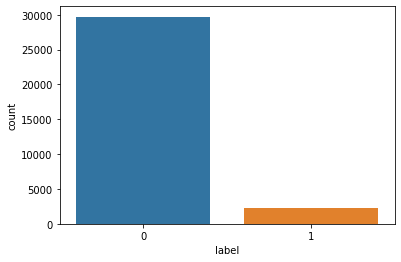

In [4]:
import seaborn as sns
sns.countplot('label',data=df_twitter)

In [5]:
df_twitter.shape

(31962, 3)

In [6]:
df_twitter.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [7]:
df_twitter.drop('id',axis=1,inplace=True)

In [8]:
df_offensive=pd.read_csv("/kaggle/input/hate-speech-and-offensive-language-dataset/labeled_data.csv")

In [9]:
df_offensive.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [10]:
df_offensive.shape

(24783, 7)

In [11]:
df_offensive.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [12]:
df_offensive.drop(['Unnamed: 0','count','hate_speech','offensive_language','neither'],axis=1,inplace=True)

In [13]:
df_offensive.head(10)

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,1,""" &amp; you might not get ya bitch back &amp; ..."
9,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


In [14]:
df_offensive['class'].unique()

array([2, 1, 0])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='class', ylabel='count'>

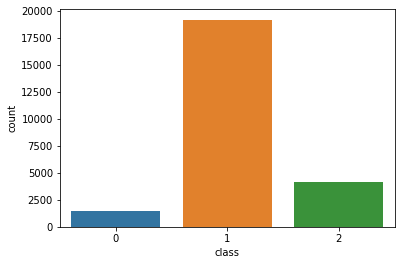

In [15]:
sns.countplot('class',data=df_offensive)

In [16]:
df_offensive[df_offensive['class']==0]['class']=1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df_offensive.head(5)

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [18]:
df_offensive['class'].unique()

array([2, 1, 0])

In [19]:
df_offensive[df_offensive['class']==0]

,class,tweet
85,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
89,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
110,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
184,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
202,0,"""@NoChillPaz: ""At least I'm not a nigger"" http..."
...,...,...
24576,0,this guy is the biggest faggot omfg
24685,0,which one of these names is more offensive kik...
24751,0,you a pussy ass nigga and I know it nigga.
24776,0,you're all niggers


In [20]:
df_offensive["class"].replace({0: 1}, inplace=True)

In [21]:
df_offensive['class'].unique()

array([2, 1])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='class', ylabel='count'>

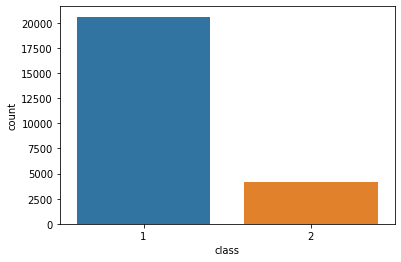

In [22]:
sns.countplot('class',data=df_offensive)

In [23]:
df_offensive[df_offensive['class']==0]

,class,tweet


In [24]:
df_offensive["class"].replace({2: 0}, inplace=True)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='class', ylabel='count'>

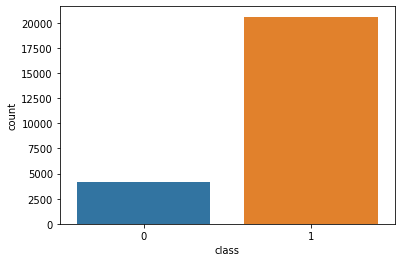

In [25]:
sns.countplot('class',data=df_offensive)

In [26]:
df_offensive.rename(columns ={'class':'label'}, inplace = True)
   

In [27]:
df_offensive.head()

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [28]:
df_offensive.iloc[0]['tweet']

"!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out..."

In [29]:
df_offensive.iloc[5]['tweet']

'!!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"'

In [30]:
frame=[df_twitter,df_offensive]
df = pd.concat(frame)

In [31]:
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

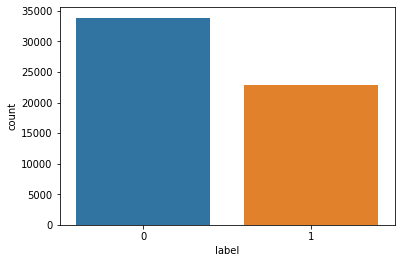

In [32]:
sns.countplot('label',data=df)

In [33]:
df.shape

(56745, 2)

In [34]:
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))


In [35]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [36]:
df['tweet']=df['tweet'].apply(clean_text)

In [37]:
df.head()

,label,tweet
0,0,user father dysfunct selfish drag kid dysfunc...
1,0,user user thank lyft credit cant use caus dont...
2,0,bihday majesti
3,0,model love u take u time urð± ððð...
4,0,factsguid societi motiv


In [38]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
  

In [39]:
def make_wordcloud(df):
    comment_words=""
    for val in df.tweet: 
        val = str(val).lower()

      
        comment_words += " ".join(val)+" "
    print(comment_words[0:100])
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,min_font_size = 10).generate(comment_words)
  
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

In [40]:
# make_wordcloud(df[df['label']==0])

In [41]:
x=df['tweet']
y=df['label']

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

42558 42558
14187 14187


In [43]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english', ngram_range=(1,5))
x_train_vectorizer=count.fit_transform(x_train)

In [44]:
x_test_vectorizer=count.transform(x_test)
x_train_vectorizer.toarray()


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [45]:
count.vocabulary_


{'pictur': 496965,
 'galleri': 244789,
 'live': 386374,
 'blackcavali': 78353,
 'caucasian': 105699,
 'webcam': 750931,
 'pictur galleri': 497099,
 'galleri live': 244792,
 'live blackcavali': 386462,
 'blackcavali caucasian': 78354,
 'caucasian webcam': 105705,
 'pictur galleri live': 497100,
 'galleri live blackcavali': 244793,
 'live blackcavali caucasian': 386463,
 'blackcavali caucasian webcam': 78355,
 'pictur galleri live blackcavali': 497101,
 'galleri live blackcavali caucasian': 244794,
 'live blackcavali caucasian webcam': 386464,
 'pictur galleri live blackcavali caucasian': 497102,
 'galleri live blackcavali caucasian webcam': 244795,
 'shoutout': 600018,
 'everybodi': 198100,
 'follow': 226779,
 'nicca': 455780,
 'shoutout everybodi': 600045,
 'everybodi follow': 198226,
 'follow nicca': 227264,
 'shoutout everybodi follow': 600046,
 'everybodi follow nicca': 198227,
 'shoutout everybodi follow nicca': 600047,
 'user': 703467,
 'bet': 56640,
 'second': 586131,
 'goal': 25

In [46]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()

x_train_tfidf = tfidf.fit_transform(x_train_vectorizer)

x_train_tfidf.toarray()
x_test_tfidf = tfidf.transform(x_test_vectorizer)


In [47]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [48]:
model_vectorizer= MultinomialNB().fit(x_train_vectorizer, y_train)
prediction_vectorizer=model_vectorizer.predict(x_test_vectorizer)
print(confusion_matrix(y_test,prediction_vectorizer))
print (classification_report(y_test, prediction_vectorizer))

[[7878  575]
 [ 458 5276]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      8453
           1       0.90      0.92      0.91      5734

    accuracy                           0.93     14187
   macro avg       0.92      0.93      0.92     14187
weighted avg       0.93      0.93      0.93     14187



In [49]:
model_tfidf= MultinomialNB().fit(x_train_tfidf, y_train)
prediction_tfidf=model_tfidf.predict(x_test_tfidf)
print (classification_report(y_test, prediction_tfidf))
print(confusion_matrix(y_test,prediction_tfidf))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      8453
           1       0.95      0.85      0.90      5734

    accuracy                           0.92     14187
   macro avg       0.93      0.91      0.92     14187
weighted avg       0.92      0.92      0.92     14187

[[8213  240]
 [ 860 4874]]


In [50]:
import xgboost as xgb
xgb_model=xgb.XGBClassifier(
        learning_rate=0.1,
        max_depth=7,
        n_estimators=80,
        use_label_encoder=False,
        eval_metric='auc' )

In [51]:
xgb_model_vectorizer = xgb_model.fit(x_train_vectorizer, y_train)
xgb_predictions_vectorizer=xgb_model_vectorizer.predict(x_test_vectorizer)
print(confusion_matrix(y_test,xgb_predictions_vectorizer))
print (classification_report(y_test, xgb_predictions_vectorizer))

[[8367   86]
 [ 923 4811]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      8453
           1       0.98      0.84      0.91      5734

    accuracy                           0.93     14187
   macro avg       0.94      0.91      0.92     14187
weighted avg       0.93      0.93      0.93     14187



In [52]:
xgb_model = xgb_model.fit(x_train_tfidf, y_train)
xgb_predictions=xgb_model.predict(x_test_tfidf)
print(confusion_matrix(y_test,xgb_predictions))
print (classification_report(y_test, xgb_predictions))

[[8358   95]
 [ 939 4795]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      8453
           1       0.98      0.84      0.90      5734

    accuracy                           0.93     14187
   macro avg       0.94      0.91      0.92     14187
weighted avg       0.93      0.93      0.93     14187



In [53]:
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,SpatialDropout1D
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.models import Sequential


In [54]:
max_words = 50000
max_len = 300
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [55]:
model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 100)          5000000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 300, 100)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 5,080,501
Trainable params: 5,080,501
Non-trainable params: 0
_________________________________________________________________


In [56]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

stop = EarlyStopping(
    monitor='val_accuracy', 
    mode='max',
    patience=5
)

checkpoint= ModelCheckpoint(
    filepath='./',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [57]:
history=model.fit(sequences_matrix,y_train,batch_size=1024,epochs=10,
          validation_split=0.2,callbacks=[stop,checkpoint])

Epoch 1/10
34/34 [==============================] - 74s 2s/step - loss: 0.6200 - accuracy: 0.6660 - val_loss: 0.3494 - val_accuracy: 0.9017
Epoch 2/10
34/34 [==============================] - 68s 2s/step - loss: 0.2874 - accuracy: 0.9124 - val_loss: 0.2060 - val_accuracy: 0.9275
Epoch 3/10
34/34 [==============================] - 67s 2s/step - loss: 0.1621 - accuracy: 0.9444 - val_loss: 0.1649 - val_accuracy: 0.9416
Epoch 4/10
34/34 [==============================] - 68s 2s/step - loss: 0.1177 - accuracy: 0.9598 - val_loss: 0.2584 - val_accuracy: 0.8813
Epoch 5/10
34/34 [==============================] - 67s 2s/step - loss: 0.1051 - accuracy: 0.9626 - val_loss: 0.1613 - val_accuracy: 0.9396
Epoch 6/10
34/34 [==============================] - 68s 2s/step - loss: 0.0847 - accuracy: 0.9709 - val_loss: 0.1665 - val_accuracy: 0.9429
Epoch 7/10
34/34 [==============================] - 68s 2s/step - loss: 0.0718 - accuracy: 0.9769 - val_loss: 0.1689 - val_accuracy: 0.9441
Epoch 8/10
34/34 [==

In [58]:
test_sequences = tokenizer.texts_to_sequences(x_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [60]:
accr = model.evaluate(test_sequences_matrix,y_test)


444/444 [==============================] - 43s 98ms/step - loss: 0.2130 - accuracy: 0.9295


In [61]:
lstm_prediction=model.predict(test_sequences_matrix)


In [62]:
res=[]
for prediction in lstm_prediction:
    if prediction[0]<0.5:
        res.append(0)
    else:
        res.append(1)

In [63]:
print(confusion_matrix(y_test,res))


[[7921  532]
 [ 468 5266]]


In [64]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [66]:
model.save("hate&abusive_model.h5")

In [68]:
import keras

In [127]:
load_model=keras.models.load_model("./hate&abusive_model.h5")
with open('tokenizer.pickle', 'rb') as handle:
    load_tokenizer = pickle.load(handle)

In [128]:
test = 'I hate my country'
def clean_text(text):
    print(text)
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    print(text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
test=[clean_text(test)]
print(test)
seq = load_tokenizer.texts_to_sequences(test)
padded = sequence.pad_sequences(seq, maxlen=300)
print(seq)
pred = load_model.predict(padded)
print("pred", pred)
if pred<0.5:
    print("no hate")
else:
    print("hate and abusive")

I hate my country
i hate my country
['hate countri']
[[61, 408]]
pred [[0.71471405]]
hate and abusive


In [95]:
frame=[df_twitter,df_offensive]
df2 = pd.concat(frame)


In [96]:
df2.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [97]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):

    text = text.lower() 
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub('', text)  
    text = text.replace('x', '')
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) 
    return text
df2['tweet'] = df2['tweet'].apply(clean_text)


In [98]:
df2.head(5)

,label,tweet
0,0,user father dysfunctional selfish drags kids d...
1,0,user user thanks #lyft credit cant use cause d...
2,0,bihday majesty
3,0,#model love u take u time ur
4,0,factsguide society #motivation


In [102]:
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100
tokenizer2 = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer2.fit_on_texts(df2['tweet'].values)
word_index = tokenizer2.word_index
print('Found %s unique tokens.' % len(word_index))

Found 67728 unique tokens.


In [104]:
X = tokenizer2.texts_to_sequences(df2['tweet'].values)
X = sequence.pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (56745, 250)


In [105]:
Y=df['label']

In [110]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(45396, 250) (45396,)
(11349, 250) (11349,)


In [111]:
model2 = Sequential()
model2.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model2.add(SpatialDropout1D(0.2))
model2.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

epochs = 10
batch_size = 1024

history2 = model2.fit(X_train, Y_train, epochs=epochs,batch_size=batch_size,validation_split=0.2,callbacks=[stop,checkpoint])

Epoch 1/10
36/36 [==============================] - 64s 2s/step - loss: 0.6156 - accuracy: 0.6580 - val_loss: 0.3104 - val_accuracy: 0.8902
Epoch 2/10
36/36 [==============================] - 59s 2s/step - loss: 0.2576 - accuracy: 0.9124 - val_loss: 0.1987 - val_accuracy: 0.9311
Epoch 3/10
36/36 [==============================] - 60s 2s/step - loss: 0.1406 - accuracy: 0.9511 - val_loss: 0.1647 - val_accuracy: 0.9419
Epoch 4/10
36/36 [==============================] - 60s 2s/step - loss: 0.1029 - accuracy: 0.9634 - val_loss: 0.1604 - val_accuracy: 0.9426
Epoch 5/10
36/36 [==============================] - 61s 2s/step - loss: 0.0819 - accuracy: 0.9716 - val_loss: 0.1780 - val_accuracy: 0.9427
Epoch 6/10
36/36 [==============================] - 59s 2s/step - loss: 0.0693 - accuracy: 0.9765 - val_loss: 0.1684 - val_accuracy: 0.9431
Epoch 7/10
36/36 [==============================] - 61s 2s/step - loss: 0.0592 - accuracy: 0.9809 - val_loss: 0.1813 - val_accuracy: 0.9410
Epoch 8/10
36/36 [==

In [114]:
# test_sequences2 = tokenizer2.texts_to_sequences(X_test)
# test_sequences_matrix2 = sequence.pad_sequences(test_sequences2,maxlen=MAX_SEQUENCE_LENGTH)
accr = model2.evaluate(X_test,Y_test)


355/355 [==============================] - 30s 85ms/step - loss: 0.2531 - accuracy: 0.9313


In [132]:
lstm_prediction2=model2.predict(X_test)
print(lstm_prediction2[0:5])
res2=[]
for prediction in lstm_prediction2:
    if prediction[0]<0.45:
        res2.append(0)
    else:
        res2.append(1)

[[9.9773598e-01]
 [4.1449009e-03]
 [9.9835384e-01]
 [9.9859816e-01]
 [1.0351390e-04]]


In [133]:
Y_test[0:5]

12238    1
14377    0
17207    1
22168    1
18801    0
Name: label, dtype: int64

In [134]:
print(confusion_matrix(Y_test,res2))


[[6267  469]
 [ 333 4280]]


In [136]:
test = 'I hate this country'
def clean_text(text):

    text = text.lower() 
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub('', text)  
    text = text.replace('x', '')
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) 
    return text
test=[clean_text(test)]
print(test)
seq = tokenizer2.texts_to_sequences(test)
padded = sequence.pad_sequences(seq, maxlen=250)
print(seq)
pred = model2.predict(padded)
print("pred", pred)
if pred<0.45:
    print("no hate")
else:
    print("hate and abusive")

['hate country']
[[71, 485]]
pred [[0.4595739]]
hate and abusive
